[0.01357311 0.03140976 0.01291437 0.02010091 0.01985715 0.01535038
 0.02161858 0.01665344 0.08782323 0.01722398 0.04042271 0.03200557
 0.04859696 0.0146737  0.01845576 0.01248086 0.01605843 0.01789871
 0.01429465 0.02462434 0.05725646 0.05479456 0.00897354 0.
 0.02555621 0.01422534 0.01676241 0.02337909 0.04184324 0.02171463
 0.0230109  0.01636748 0.02319008 0.02083673 0.01877265 0.
 0.02041254 0.0172034  0.01285206 0.02099035 0.05118692 0.01463486]


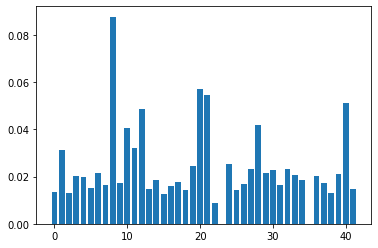

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
# load data
import pandas as pd

dataset = pd.read_csv("#dataset_path")
X = dataset.drop('Label_Category_Num',axis =1)
y = dataset['Label_Category_Num']
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None
 
# load data
dataset = pd.read_csv("dataset_path")
X = dataset.drop('Label_Category_Num',axis =1)
y = dataset['Label_Category_Num']
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# scale the data
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# resample the data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# fit the XGBoost classifier using all the features
model = XGBClassifier()
model.fit(X_train, y_train)
# fit the KNN classifier using each feature importance 
# value as a feature selection threshold
thresholds = np.sort(model.feature_importances_)

for threshold in thresholds:

    # select the features
    selector = SelectFromModel(model, threshold=threshold, prefit=True)
    X_train_ = selector.transform(X_train)
    X_test_ = selector.transform(X_test)

    # extract the names of the selected features 
    selected_features = X.columns[selector.get_support()].to_list()

    # train the model
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn.fit(X_train_, y_train)

    # generate the model predictions
    y_pred = knn.predict(X_test_)

    # calculate the model performance metrics
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print('Threshold: {}'.format(threshold))
    print('Selected features: \n {}'.format(selected_features))
    print('Confusion matrix: \n {}'.format(cm))
    print('Classification report: \n {}'.format(report))
    print('----------------------------')

# Threshold: 0.2871088981628418
# Selected features: 
#  ['x1', 'x2', 'x3']
# Confusion matrix: 
#  [[6 0]
#  [7 7]]


Threshold: 0.0
Selected features: 
 ['Unnamed: 0', 'position_id', 'attribute_value_ml_acceleration', 'attribute_value_ml_aerial_ability', 'attribute_value_ml_agility', 'attribute_value_ml_anticipation', 'attribute_value_ml_balance', 'attribute_value_ml_bravery', 'attribute_value_ml_command_of_area', 'attribute_value_ml_communication', 'attribute_value_ml_composure', 'attribute_value_ml_concentration', 'attribute_value_ml_creativity', 'attribute_value_ml_crossing', 'attribute_value_ml_decisions', 'attribute_value_ml_defensive_workrate', 'attribute_value_ml_determination', 'attribute_value_ml_dribling', 'attribute_value_ml_finishing', 'attribute_value_ml_first_touch', 'attribute_value_ml_first_touch_handling', 'attribute_value_ml_flair', 'attribute_value_ml_freekicks', 'attribute_value_ml_handling', 'attribute_value_ml_high_balls', 'attribute_value_ml_jumping', 'attribute_value_ml_long_shots', 'attribute_value_ml_marking', 'attribute_value_ml_off_the_ball', 'attribute_value_ml_offensive_